In [1]:
import pandas as pd

data = pd.read_excel('APEX Pie Data.xlsx')
data

,industry_name,client_count
0,Construction,303
1,Professional Services,292
2,Manufacturing,218
3,Admin & Waste Mgmt,156
4,Wholesale,88
5,Health Care,61
6,Transport,60
7,Real Estate,52
8,Other Services,46
9,Education,43


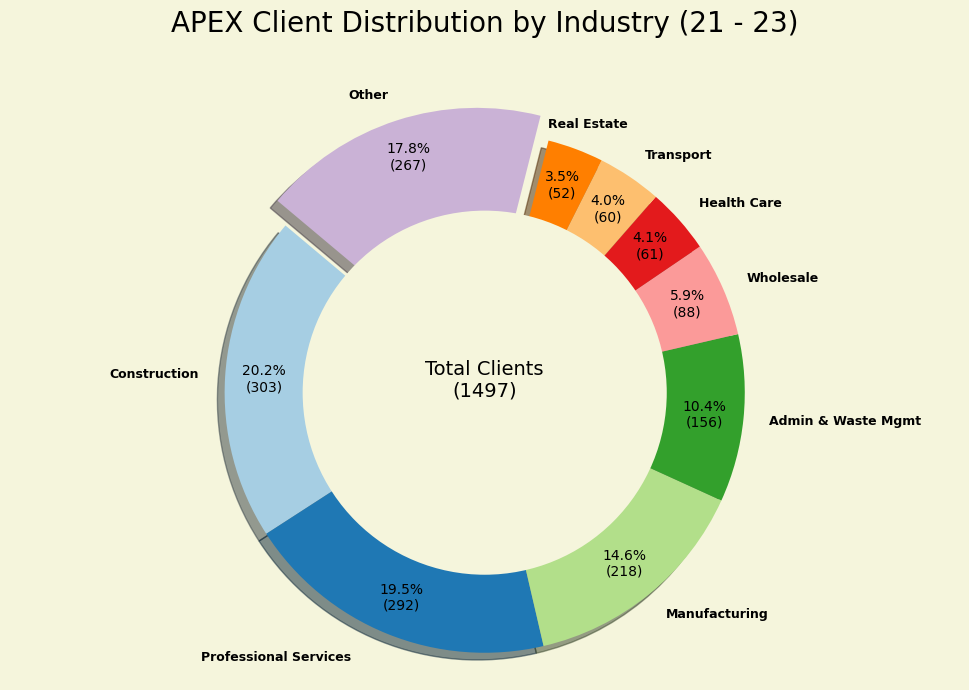

In [7]:
import matplotlib.pyplot as plt
import pandas as pd


data_sorted = data.sort_values(by='client_count', ascending=False)
top_categories_threshold = 8
top_categories = data_sorted[:top_categories_threshold]
other_categories = data_sorted[top_categories_threshold:]

other_sum = other_categories['client_count'].sum()
other_category = pd.DataFrame(data={'industry_name': ['Other'], 'client_count': [other_sum]})

data_combined = pd.concat([top_categories, other_category], ignore_index=True)
explode_tuple = [0.1 if industry == 'Other' else 0 for industry in data_combined['industry_name']]

total_client_count = data_combined['client_count'].sum()

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct, v=val)
    return my_format

fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(data_combined['client_count'], labels=data_combined['industry_name'],
                                  autopct=autopct_format(data_combined['client_count']), startangle=140,
                                  explode=explode_tuple, shadow=True, pctdistance=0.85, 
                                  colors=plt.get_cmap('Paired').colors)

centre_circle = plt.Circle((0,0), 0.70, fc='beige')
fig.gca().add_artist(centre_circle)

ax.text(0.5, 0.5, f'Total Clients\n({total_client_count})', horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes, fontsize=14, color='black')

plt.setp(texts, size=9, weight="bold")
plt.setp(autotexts, size=10, color="black")

for text in texts:
    if text.get_text() == 'Real Estate':
        text.set_position((text.get_position()[0] - 0.14, text.get_position()[1]))
    elif text.get_text() == 'Professional Services':
        text.set_position((text.get_position()[0] - 0.1, text.get_position()[1]))

fig.patch.set_facecolor('beige') 
ax.set_facecolor('beige')  

ax.set_title('APEX Client Distribution by Industry (21 - 23)', fontsize=20, pad=35)
ax.axis('equal')  
plt.ylabel('')

plt.tight_layout()
plt.show()

In [8]:
fig.savefig('APEX Clients by Industry Distribution.png', 
            format='png', dpi=300, bbox_inches='tight', 
            facecolor=fig.get_facecolor(), edgecolor='none')